In [1]:
import pandas
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# We load the data
df = pandas.read_csv("datasets/training_1.csv")
df.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [3]:
# Let's drop the not interesting columns
df.drop(["DATETIME"],axis=1,inplace=True)
for column in df:
    if df[column].std() == 0:
        df.drop([column],axis=1,inplace=True)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,99.018150,1,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,99.115639,1,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,98.440498,1,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,97.594460,1,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,97.370277,1,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


In [4]:
# Normalization
df = (df-df.mean())/df.std()
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,-1.801565,-0.842113,-1.489650,-1.437018,-0.125298,-0.302075,-2.099720,-0.191826,0.699668,0.607166,...,-0.488900,0.968419,-0.470904,0.195791,-1.257251,0.754404,-1.255119,-0.149595,-1.032066,-0.363334
1,-1.882325,-0.869302,-0.824294,-1.364678,0.514420,0.701111,-1.750172,-0.182128,0.701976,0.607166,...,-0.490189,1.186167,-0.473947,0.421498,-1.269105,0.771132,-1.266866,-0.139617,-1.039913,-0.375830
2,-1.959194,-0.884949,-0.090836,-0.577027,1.124100,0.730101,-1.274714,-0.249295,0.685992,0.607166,...,-0.488435,1.376168,-0.473933,0.512447,-1.099760,0.955404,-1.096286,0.846358,-1.039846,-0.375723
3,-1.948581,-0.869213,0.695183,0.326816,1.637971,0.730101,-0.119562,-0.333465,0.665963,0.607166,...,-0.454789,1.557952,-0.441418,0.704115,0.356578,-0.981372,0.351596,1.569827,-1.017304,-0.339829
4,-1.823373,-0.814845,1.527148,1.559008,1.028984,0.730101,1.371833,-0.355768,0.660656,0.607166,...,-0.399455,1.779975,-0.387143,1.024245,0.397674,-0.973739,0.392601,1.650352,-0.987935,-0.293062


In [5]:
# Are the signals correlated?
for column_i in df:
    for column_j in df:
        if column_i == column_j: continue
        print column_i, column_j, stats.pearsonr(df[column_i],df[column_j])[0]

L_T1 L_T2 -0.24185582069048747
L_T1 L_T3 -0.05106024947475682
L_T1 L_T4 -0.013559984007193776
L_T1 L_T5 -0.10682489062792513
L_T1 L_T6 -0.08829332510709101
L_T1 L_T7 0.010477143030460748
L_T1 F_PU1 0.038016300014057286
L_T1 F_PU2 -0.25926733018895076
L_T1 S_PU2 -0.23116315312090233
L_T1 F_PU4 -0.04528874590142676
L_T1 S_PU4 -0.03168852314390886
L_T1 F_PU6 -0.008489090512194255
L_T1 S_PU6 -0.008680517261571718
L_T1 F_PU7 0.024330928937004323
L_T1 S_PU7 0.03955634616472317
L_T1 F_PU8 0.00683221593768136
L_T1 S_PU8 -0.009138629611275626
L_T1 F_PU10 0.023854980248088607
L_T1 S_PU10 -0.002559451987218083
L_T1 F_PU11 -0.033237606022734956
L_T1 S_PU11 -0.03339735251058103
L_T1 F_V2 -0.3159244226910246
L_T1 S_V2 -0.46273609499387647
L_T1 P_J280 0.3309482332109816
L_T1 P_J269 -0.04003576116280926
L_T1 P_J300 -0.3331569031672189
L_T1 P_J256 -0.0873067932503227
L_T1 P_J289 -0.33678463613525744
L_T1 P_J415 -0.01476825387903342
L_T1 P_J302 0.2621317280532651
L_T1 P_J306 0.002898858481734127
L_T1 P_

F_PU4 P_J300 -0.5525098386053992
F_PU4 P_J256 0.9559029678343062
F_PU4 P_J289 -0.5389197626881156
F_PU4 P_J415 0.17024296276828838
F_PU4 P_J302 -0.21506591287322555
F_PU4 P_J306 0.13542477776676543
F_PU4 P_J307 -0.2161442176567773
F_PU4 P_J317 0.20381389194049443
F_PU4 P_J14 -0.07638591162534579
F_PU4 P_J422 -0.4896954326411424
S_PU4 L_T1 -0.03168852314390886
S_PU4 L_T2 -0.2606168649612524
S_PU4 L_T3 -0.14155003039725816
S_PU4 L_T4 -0.18668295907631932
S_PU4 L_T5 0.2730637178983547
S_PU4 L_T6 0.27817231899253414
S_PU4 L_T7 -0.1346481071013389
S_PU4 F_PU1 0.041135437065472215
S_PU4 F_PU2 -0.01085213070248611
S_PU4 S_PU2 -0.019293842172100752
S_PU4 F_PU4 0.9986486512926873
S_PU4 F_PU6 -0.015296852672645399
S_PU4 S_PU6 -0.01493268439749187
S_PU4 F_PU7 0.22746082988679087
S_PU4 S_PU7 0.24769232522228157
S_PU4 F_PU8 0.1284836302324787
S_PU4 S_PU8 0.13662249073418803
S_PU4 F_PU10 0.22086940665819146
S_PU4 S_PU10 0.2311253198959072
S_PU4 F_PU11 0.024929220701608964
S_PU4 S_PU11 0.024990102456

F_PU11 P_J269 0.006408814635432869
F_PU11 P_J300 -0.00856973749543189
F_PU11 P_J256 0.02923310916826682
F_PU11 P_J289 -0.008241520835548492
F_PU11 P_J415 0.010614406631440388
F_PU11 P_J302 -0.03243770218648762
F_PU11 P_J306 0.006414688343747415
F_PU11 P_J307 -0.03292950768032737
F_PU11 P_J317 0.07718999255645098
F_PU11 P_J14 -0.02092587793872086
F_PU11 P_J422 -0.0060281834331243345
S_PU11 L_T1 -0.03339735251058103
S_PU11 L_T2 -0.015520991516617027
S_PU11 L_T3 -0.003959416814304453
S_PU11 L_T4 -0.007163958289306581
S_PU11 L_T5 0.016260882377503803
S_PU11 L_T6 -0.004847373102636052
S_PU11 L_T7 -0.03508425165783749
S_PU11 F_PU1 -0.006248432045588546
S_PU11 F_PU2 0.014443155208161067
S_PU11 S_PU2 0.012977301919447579
S_PU11 F_PU4 0.023920525755804698
S_PU11 S_PU4 0.024990102456255877
S_PU11 F_PU6 -0.0009140783369258412
S_PU11 S_PU6 -0.0009141814513069548
S_PU11 F_PU7 0.008376332595352299
S_PU11 S_PU7 0.009117811098797692
S_PU11 F_PU8 0.0042425796120777355
S_PU11 S_PU8 0.006752065936823452


P_J306 S_PU8 0.9894258484203357
P_J306 F_PU10 0.08168711650418971
P_J306 S_PU10 0.1270683423037071
P_J306 F_PU11 0.006414688343747415
P_J306 S_PU11 0.006106608252125763
P_J306 F_V2 -0.14403010616728606
P_J306 S_V2 -0.10720953341021992
P_J306 P_J280 -0.011772302569721045
P_J306 P_J269 -0.06268035352049212
P_J306 P_J300 -0.15732850687780797
P_J306 P_J256 0.050460346180828335
P_J306 P_J289 -0.1566557992497125
P_J306 P_J415 0.06800838746685443
P_J306 P_J302 -0.7634029635219733
P_J306 P_J307 -0.7600288189255491
P_J306 P_J317 -0.06328318852226285
P_J306 P_J14 0.014722145260772517
P_J306 P_J422 -0.15619498559509815
P_J307 L_T1 0.2603932877125424
P_J307 L_T2 0.04436690857617801
P_J307 L_T3 0.4091556964039769
P_J307 L_T4 0.13478158706166096
P_J307 L_T5 0.0238776980372682
P_J307 L_T6 -0.2589154421144267
P_J307 L_T7 0.2275737870556349
P_J307 F_PU1 -0.31585468332391714
P_J307 F_PU2 0.14192823861660436
P_J307 S_PU2 0.1670544338177365
P_J307 F_PU4 -0.2161442176567773
P_J307 S_PU4 -0.2050701964808574

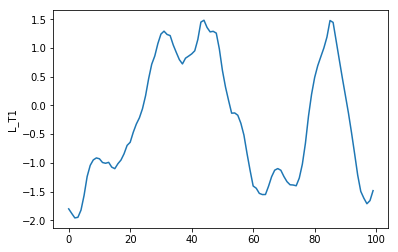

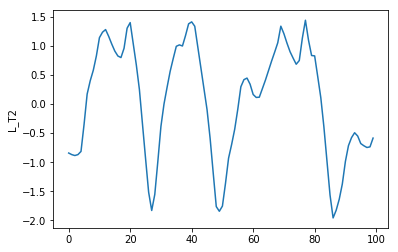

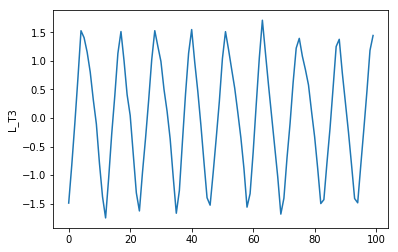

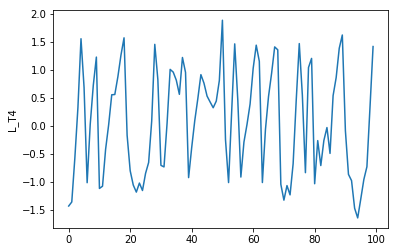

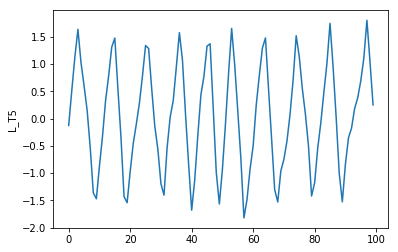

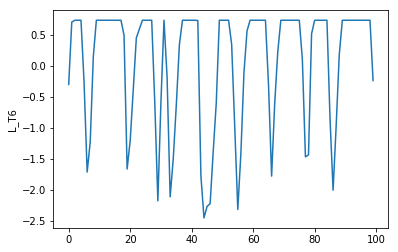

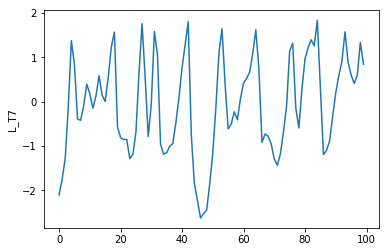

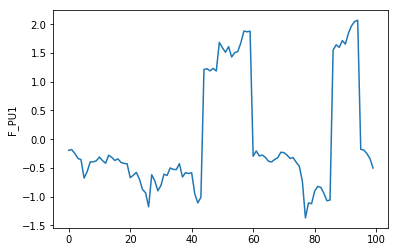

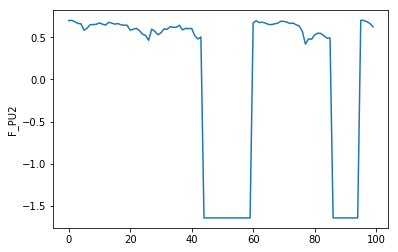

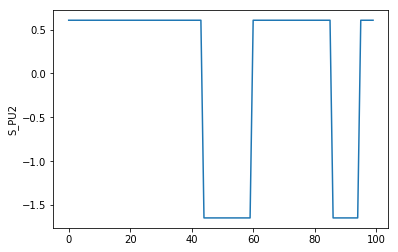

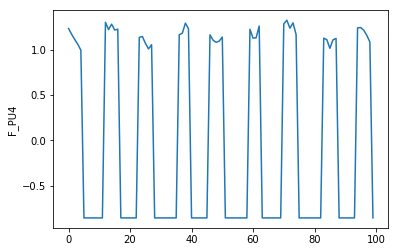

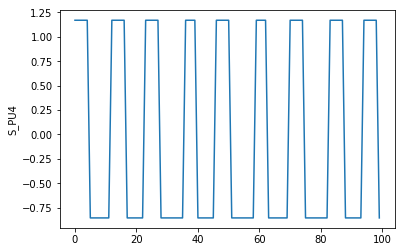

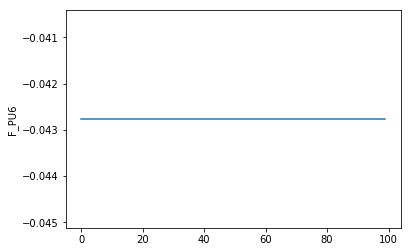

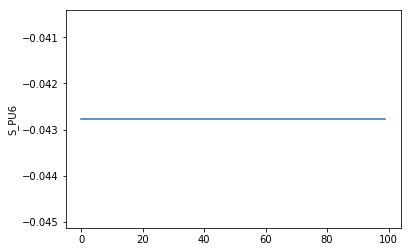

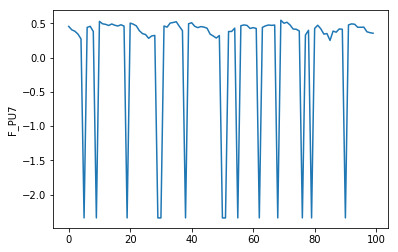

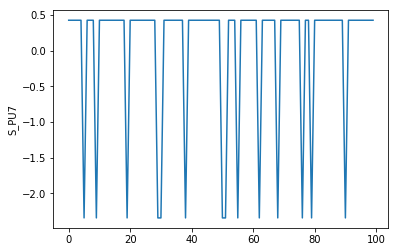

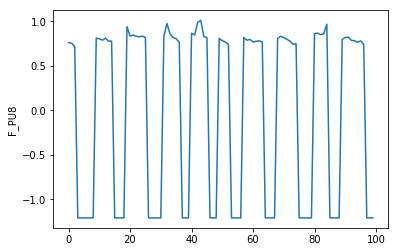

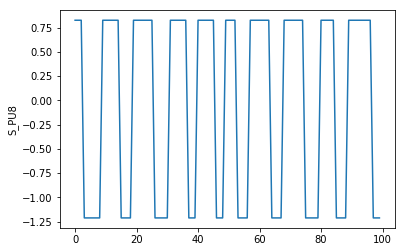

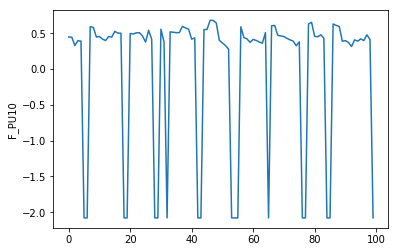

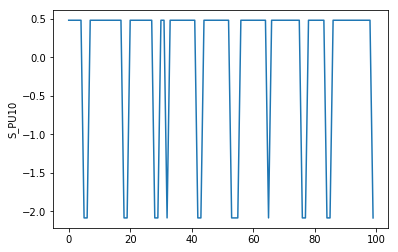

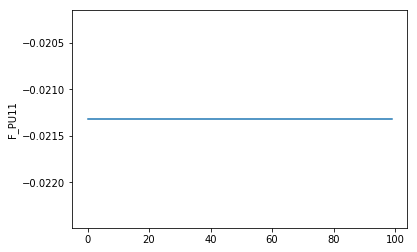

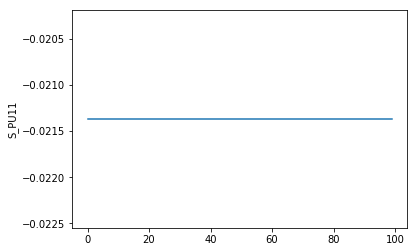

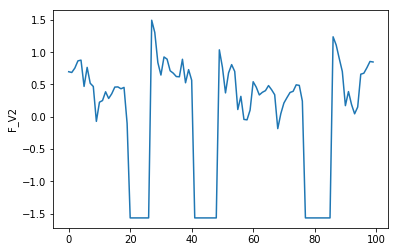

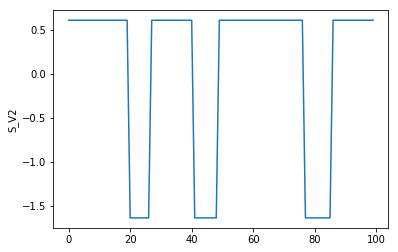

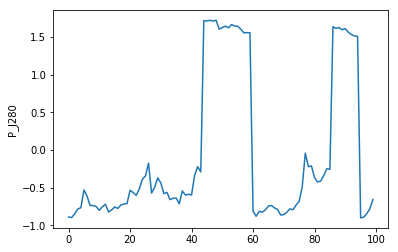

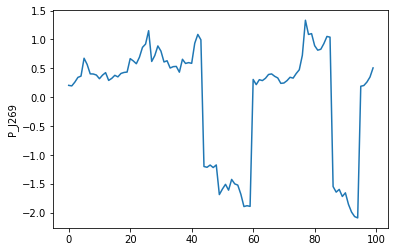

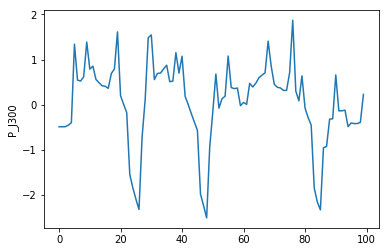

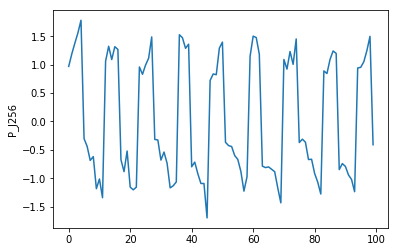

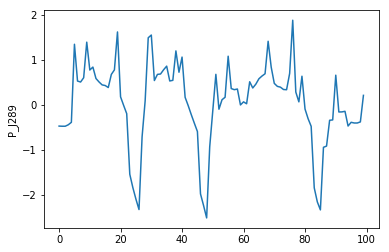

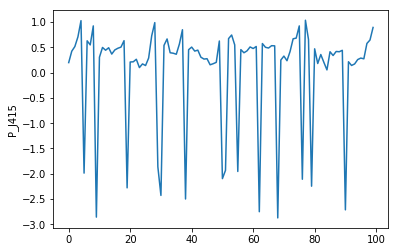

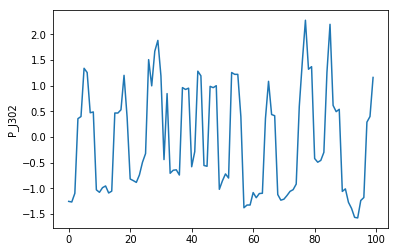

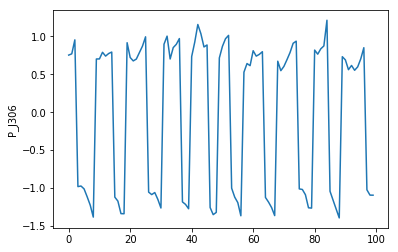

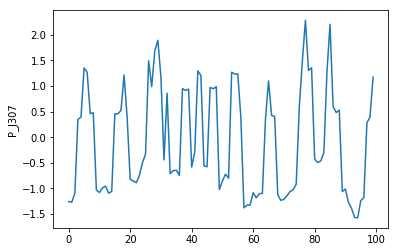

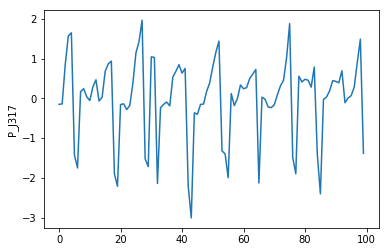

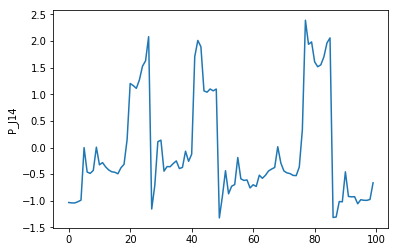

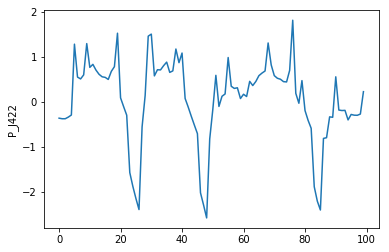

In [6]:
for column in df:
    plt.plot(df[column][:100],'-')
    plt.ylabel(column)
    plt.show()